# 01 - Exploración de Datos

En este notebook vamos hacer la carga de los datos desde el archivo `train.csv` que encontramos en la competencia de Kaggle UDEA/ai4eng 20252

Exploramos inicialmente la estructura de los datos, las distintas variables disponibles, la cantidad de registros y algunas distribuciones básicas.

### Realizamos las importaciones necesarias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, json
from google.colab import userdata

## Traemos los dataset desde Kaggle

Antes de poder traer explicitamente los datos de Kaggle debemos organizar las credenciales para ingresar, en este caso usando los secretos de coolab configuro el username y la key o token

In [6]:
user = userdata.get('KAGGLE_USERNAME')
key = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = user
os.environ["KAGGLE_KEY"] = key
assert user and key, "Faltan los secretos KAGGLE_USERNAME/KAGGLE_KEY"

Ahora si traemos los datos desde Kaggle

In [7]:
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia

  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 1.10GB/s]


Ahora vamos a descomprimirlo

In [8]:
!unzip udea*.zip > /dev/null
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


##**Vizualizacion de los datos**

###Vizualizacion Inicial

In [9]:
z = pd.read_csv("train.csv")
print ("shape del dataframe train.csv", z.shape)

shape del dataframe train.csv (692500, 21)


Ahora vamos a darle un primer vistazo a los datos, tomemos o revisemos las columnas y datos de las primeras 3 filas

In [10]:
z.head(3)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264


In [11]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           692500 non-null  int64  
 1   PERIODO_ACADEMICO            692500 non-null  int64  
 2   E_PRGM_ACADEMICO             692500 non-null  object 
 3   E_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   E_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   E_HORASSEMANATRABAJA         661643 non-null  object 
 6   F_ESTRATOVIVIENDA            660363 non-null  object 
 7   F_TIENEINTERNET              665871 non-null  object 
 8   F_EDUCACIONPADRE             669322 non-null  object 
 9   F_TIENELAVADORA              652727 non-null  object 
 10  F_TIENEAUTOMOVIL             648877 non-null  object 
 11  E_PRIVADO_LIBERTAD           692500 non-null  object 
 12  E_PAGOMATRICULAPROPIO        686002 non-null  object 
 13 

Vamos a mirar que tantos datos nulos hay en el dataset


In [12]:
NA = z.isna().mean().sort_values(ascending=False)
NA.head(30)

,0
F_TIENEAUTOMOVIL,0.062994
F_TIENELAVADORA,0.057434
F_TIENECOMPUTADOR,0.055022
F_ESTRATOVIVIENDA,0.046407
E_HORASSEMANATRABAJA,0.044559
F_TIENEINTERNET.1,0.038453
F_TIENEINTERNET,0.038453
F_EDUCACIONMADRE,0.034172
F_EDUCACIONPADRE,0.033470
E_PAGOMATRICULAPROPIO,0.009383


In [13]:
fila_con_null = z.isna().any(axis=1).mean()
print(f"% de filas con almenus un 1 null (o NA): {fila_con_null:.2%}")

% de filas con almenus un 1 null (o NA): 9.18%


En el conjunto de entrenamiento encontramos que un 9.18% de las columnas cuentan con datos faltantes. Los porcentajes son bajos (máximo ≈ 6.3% en F_TIENEAUTOMOVIL; la mayoría entre 3%-5%), pero no despreciables porque afectan el número de filas completas y las decisiones de preprocesamiento.

### Resolucion de Duplicados al identificar el problema

Mirando bien las columnas me doy cuenta que esta F_TIENEINTERNET y F_TIENEINTERNET.1 esta es una clara duplicidad de datos lo que podria llegar a a afectar la efectividad en el entrenamiento posterior, voy a proceder a corroborar que contengan la misma informacion en dicho caso eliminare la duplicidad permaneciendo unicamente con F_TIENEINTERNET

In [14]:
if "F_TIENEINTERNET.1" in z.columns:
    z = z.drop(columns=["F_TIENEINTERNET.1"])
z.head(3)

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264


Ademas esto me recordo el revisar si existen filas o datos que esten duplicados en el data set, vamos a revisar y eliminar dichos datos duplicados si es que existen.

In [15]:
dup_id = z.duplicated(subset=["ID"]).sum() if "ID" in z.columns else None
dup_full = z.duplicated().sum()
print("Duplicados por ID:", dup_id)
print("Filas 100% duplicadas:", dup_full)

Duplicados por ID: 0
Filas 100% duplicadas: 0


Por suerte parece que no contamos con filas duplicadas, buena informacion

### Explorando variables y visualizando


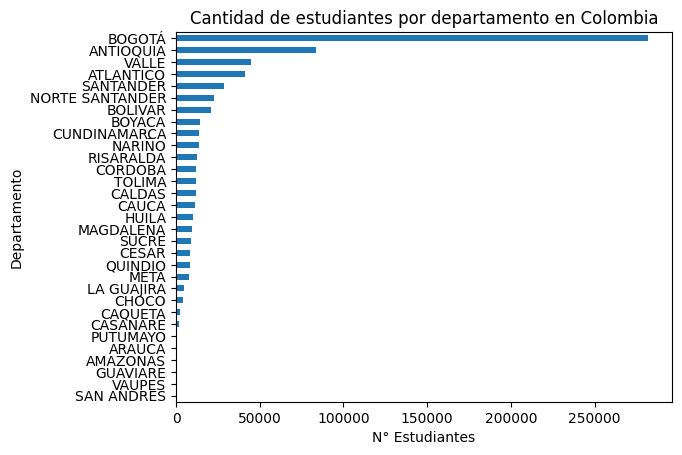

In [16]:
# Revisemos primero cantidad estudiantes por departamento
col_depto = "E_PRGM_DEPARTAMENTO"
top = (z[col_depto]
       .value_counts()
       .head(32)
       .sort_values())

ax = top.plot(kind="barh")
ax.set_title("Cantidad de estudiantes por departamento en Colombia")
ax.set_xlabel("N° Estudiantes"); ax.set_ylabel("Departamento")
plt.show()


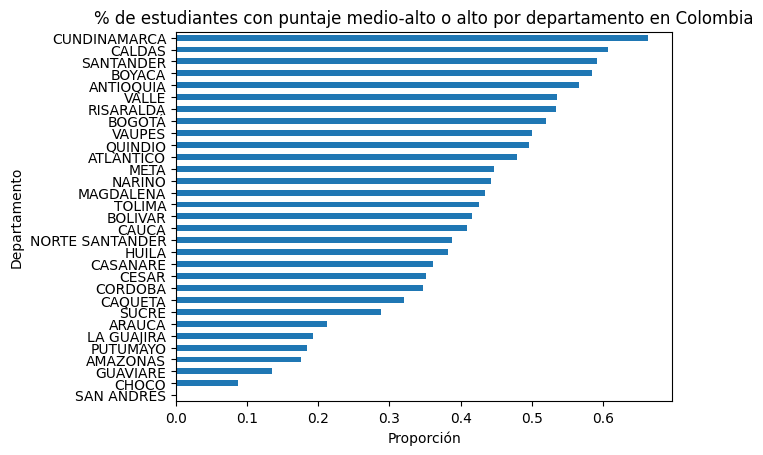

In [17]:
#Revisemos % de personas con un puntaje medio-alto o alto por departamento
col_depto = "E_PRGM_DEPARTAMENTO"
puntaje = "RENDIMIENTO_GLOBAL"

x = z[puntaje].astype(str).str.strip().str.lower().map({"bajo":0, "medio-bajo":0, "medio-alto":1, "alto":1})
rate = x.groupby(z[col_depto]).mean().dropna()
top = rate.sort_values(ascending=False).head(32).sort_values()

ax = top.plot(kind="barh")
ax.set_title("% de estudiantes con puntaje medio-alto o alto por departamento en Colombia")
ax.set_xlabel("Proporción"); ax.set_ylabel("Departamento")
plt.show()

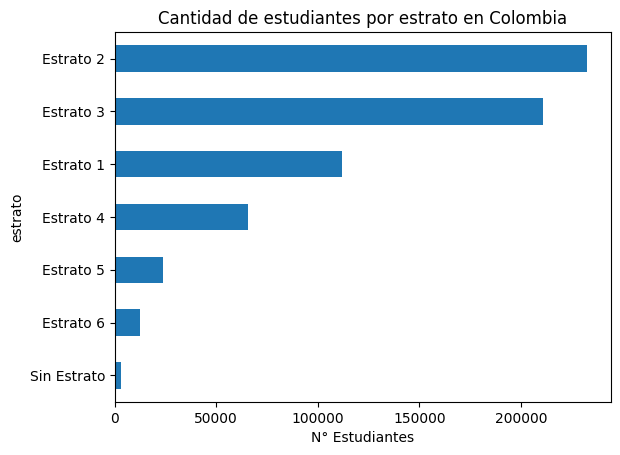

In [18]:
# Cantidad de estudiantes por estrato
estra = "F_ESTRATOVIVIENDA"
top = (z[estra]
       .value_counts()
       .head(10)
       .sort_values())

ax = top.plot(kind="barh")
ax.set_title("Cantidad de estudiantes por estrato en Colombia")
ax.set_xlabel("N° Estudiantes"); ax.set_ylabel("estrato")
plt.show()

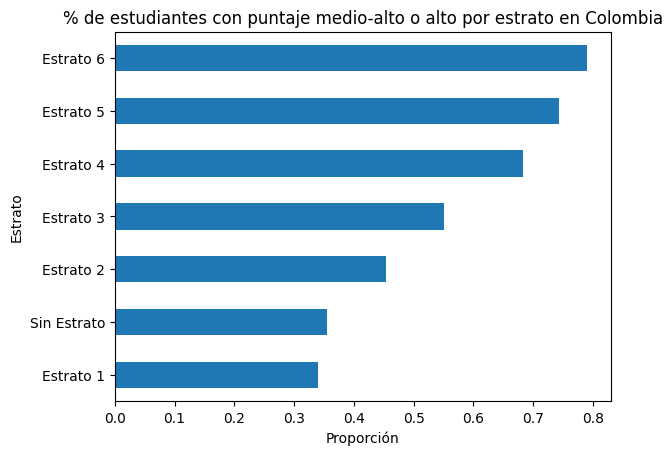

In [19]:
#Revisemos % de personas con un puntaje medio-alto o alto por estrato
estra = "F_ESTRATOVIVIENDA"
puntaje = "RENDIMIENTO_GLOBAL"

x = z[puntaje].astype(str).str.strip().str.lower().map({"bajo":0, "medio-bajo":0, "medio-alto":1, "alto":1})
rate = x.groupby(z[estra]).mean().dropna()
top = rate.sort_values(ascending=False).head(32).sort_values()

ax = top.plot(kind="barh")
ax.set_title("% de estudiantes con puntaje medio-alto o alto por estrato en Colombia")
ax.set_xlabel("Proporción"); ax.set_ylabel("Estrato")
plt.show()

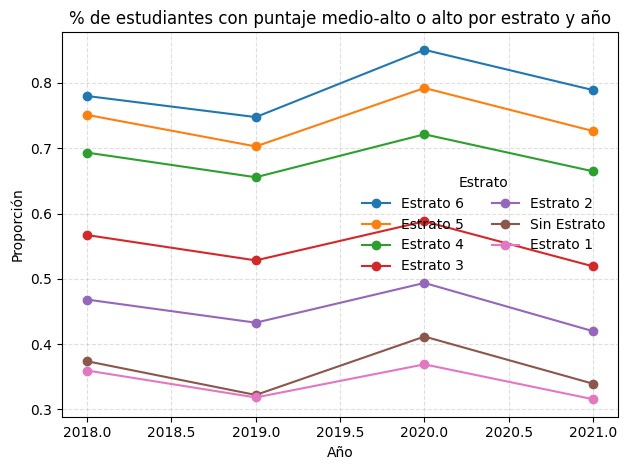

In [23]:
estra   = "F_ESTRATOVIVIENDA"
puntaje = "RENDIMIENTO_GLOBAL"
periodo = "PERIODO_ACADEMICO"

x = (
    z[puntaje].astype(str).str.strip().str.lower().map({"bajo":0, "medio-bajo":0, "medio-alto":1, "alto":1})
)

anio = z[periodo].astype(str).str.extract(r"(\d{4})")[0].astype("Int64")

hi = pd.DataFrame({"hi": x, "year": anio, "estrato": z[estra]}).dropna()
tabla = (
    hi.groupby(["year","estrato"])["hi"].mean()
      .unstack("estrato") # columnas = estratos
      .sort_index() # index = años en orden
)

top_cols = tabla.mean().sort_values(ascending=False).index
tabla_top = tabla[top_cols]

ax = tabla_top.plot(marker="o")
ax.set_title("% de estudiantes con puntaje medio-alto o alto por estrato y año")
ax.set_xlabel("Año")
ax.set_ylabel("Proporción")
ax.grid(True, linestyle="--", alpha=0.4)
ax.legend(title="Estrato", ncol=2, frameon=False)
plt.tight_layout()
plt.show()